# Muhammad Ali EDA Portfolio Project 

## Chicago Public Schools - Progress Report Cards (2011-2012)

The city of Chicago released a dataset showing all school level performance data used to create School Report Cards for the 2011-2012 school year. The dataset is available from the Chicago Data Portal: [https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t](https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork-20127838&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

This dataset includes a large number of metrics. Start by familiarizing yourself with the types of metrics in the database: [https://data.cityofchicago.org/api/assets/AAD41A13-BE8A-4E67-B1F5-86E711E09D5F?download=true](https://data.cityofchicago.org/api/assets/AAD41A13-BE8A-4E67-B1F5-86E711E09D5F?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2022-01-01&download=true&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork-20127838&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)


### Connect to the database

Let us now load the ipython-sql  extension and establish a connection with IBM db2 database.


In [3]:
%load_ext sql

In [4]:

%sql ibm_db_sa://mvp13900:AKqc8s5EWDhtMlMx@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/bludb?security=SSL

'Connected: mvp13900@bludb'

### Query the database system catalog to retrieve table metadata

##### You can verify that the table creation was successful by retrieving the list of all tables in your schema and checking whether the SCHOOLS table was created


In [5]:
# type in your query to retrieve list of all tables in the database for your db2 schema (username)
%sql select * from SYSCAT.TABLES where TABNAME = 'SCHOOLS'


 * ibm_db_sa://mvp13900:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/bludb
Done.


tabschema,tabname,owner,ownertype,TYPE,status,base_tabschema,base_tabname,rowtypeschema,rowtypename,create_time,alter_time,invalidate_time,stats_time,colcount,tableid,tbspaceid,card,npages,mpages,fpages,npartitions,nfiles,tablesize,overflow,tbspace,index_tbspace,long_tbspace,parents,children,selfrefs,keycolumns,keyindexid,keyunique,checkcount,datacapture,const_checked,pmap_id,partition_mode,log_attribute,pctfree,append_mode,REFRESH,refresh_time,LOCKSIZE,VOLATILE,row_format,property,statistics_profile,compression,rowcompmode,access_mode,clustered,active_blocks,droprule,maxfreespacesearch,avgcompressedrowsize,avgrowcompressionratio,avgrowsize,pctrowscompressed,logindexbuild,codepage,collationschema,collationname,collationschema_orderby,collationname_orderby,encoding_scheme,pctpagessaved,last_regen_time,secpolicyid,protectiongranularity,auditpolicyid,auditpolicyname,auditexceptionenabled,definer,oncommit,logged,onrollback,lastused,control,temporaltype,tableorg,extended_row_size,pctextendedrows,remarks
MVP13900,SCHOOLS,MVP13900,U,T,N,None,None,None,None,2022-08-30 16:36:26.122721,2022-08-30 16:36:26.122721,2022-08-30 16:36:26.122721,None,78,4,720,-1,-1,-1,-1,-1,-1,-1,-1,MVP13900SPACE1,None,None,0,0,0,0,0,0,0,N,YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY,1,,0,-1,N,,None,R,,N,,None,N,,F,None,-1,N,999,-1,-1.0,-1,-1.0,None,1208,SYSIBM,IDENTITY,SYSIBM,IDENTITY,,-1,2022-08-30 16:36:26.122721,0,,None,None,N,MVP13900,,,,2022-08-30,,N,R,N,-1.0,None


### Query the database system catalog to retrieve column metadata

##### The SCHOOLS table contains a large number of columns. How many columns does this table have?


In [6]:
# type in your query to retrieve the number of columns in the SCHOOLS table
%sql select count(*) from SYSCAT.COLUMNS where TABNAME = 'SCHOOLS'

 * ibm_db_sa://mvp13900:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/bludb
Done.


1
78


Now retrieve the the list of columns in SCHOOLS table and their column type (datatype) and length.


In [7]:
# type in your query to retrieve all column names in the SCHOOLS table along with their datatypes and length
%sql select COLNAME, TYPENAME, LENGTH from SYSCAT.COLUMNS where TABNAME = 'SCHOOLS'

 * ibm_db_sa://mvp13900:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/bludb
Done.


colname,typename,length
CITY,VARCHAR,7
STATE,VARCHAR,2
ZIP_CODE,INTEGER,4
PHONE_NUMBER,VARCHAR,14
LINK,VARCHAR,78
NETWORK_MANAGER,VARCHAR,40
COLLABORATIVE_NAME,VARCHAR,34
ADEQUATE_YEARLY_PROGRESS_MADE_,VARCHAR,3
TRACK_SCHEDULE,VARCHAR,12
CPS_PERFORMANCE_POLICY_STATUS,VARCHAR,16


### Questions

1.  Is the column name for the "SCHOOL ID" attribute in upper or mixed case?
2.  What is the name of "Community Area Name" column in your table? Does it have spaces?
3.  Are there any columns in whose names the spaces and paranthesis (round brackets) have been replaced by the underscore character "\_"?


## Problems

### Problem 1

##### How many Elementary Schools are in the dataset?


In [8]:
%sql select count(*) from SCHOOLS where "Elementary, Middle, or High School" = 'ES'

 * ibm_db_sa://mvp13900:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/bludb
Done.


1
462


### Problem 2

##### What is the highest Safety Score?


In [9]:
%sql select MAX(SAFETY_SCORE) from SCHOOLS

 * ibm_db_sa://mvp13900:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/bludb
Done.


1
99


### Problem 3

##### Which schools have highest Safety Score?


In [10]:
%sql select Name_of_School, Safety_Score from SCHOOLS where \
  Safety_Score= (select MAX(Safety_Score) from SCHOOLS)

 * ibm_db_sa://mvp13900:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/bludb
Done.


name_of_school,safety_score
Abraham Lincoln Elementary School,99
Alexander Graham Bell Elementary School,99
Annie Keller Elementary Gifted Magnet School,99
Augustus H Burley Elementary School,99
Edgar Allan Poe Elementary Classical School,99
Edgebrook Elementary School,99
Ellen Mitchell Elementary School,99
James E McDade Elementary Classical School,99
James G Blaine Elementary School,99
LaSalle Elementary Language Academy,99


### Problem 4

##### What are the top 10 schools with the highest "Average Student Attendance"?


In [11]:
%sql select Name_of_School, Average_Student_Attendance from SCHOOLS \
    order by Average_Student_Attendance desc nulls last limit 10 

 * ibm_db_sa://mvp13900:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/bludb
Done.


name_of_school,average_student_attendance
John Charles Haines Elementary School,98.40%
James Ward Elementary School,97.80%
Edgar Allan Poe Elementary Classical School,97.60%
Orozco Fine Arts & Sciences Elementary School,97.60%
Rachel Carson Elementary School,97.60%
Annie Keller Elementary Gifted Magnet School,97.50%
Andrew Jackson Elementary Language Academy,97.40%
Lenart Elementary Regional Gifted Center,97.40%
Disney II Magnet School,97.30%
John H Vanderpoel Elementary Magnet School,97.20%


### Problem 5

##### Retrieve the list of 5 Schools with the lowest Average Student Attendance sorted in ascending order based on attendance


In [12]:
%sql select Name_of_School, Average_Student_Attendance from SCHOOLS \
    order by Average_Student_Attendance asc nulls last limit 5 

 * ibm_db_sa://mvp13900:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/bludb
Done.


name_of_school,average_student_attendance
Richard T Crane Technical Preparatory High School,57.90%
Barbara Vick Early Childhood & Family Center,60.90%
Dyett High School,62.50%
Wendell Phillips Academy High School,63.00%
Orr Academy High School,66.30%


### Problem 6

##### Now remove the '%' sign from the above result set for Average Student Attendance column


In [13]:
%sql select Name_of_School, REPLACE(Average_Student_Attendance, '%', '') from SCHOOLS \
    order by Average_Student_Attendance asc nulls last limit 5 

 * ibm_db_sa://mvp13900:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/bludb
Done.


name_of_school,2
Richard T Crane Technical Preparatory High School,57.90
Barbara Vick Early Childhood & Family Center,60.90
Dyett High School,62.50
Wendell Phillips Academy High School,63.00
Orr Academy High School,66.30


### Problem 7

##### Which Schools have Average Student Attendance lower than 70%?


In [14]:
%sql select Name_of_School, Average_Student_Attendance from SCHOOLS \
    where DECIMAL ( REPLACE(Average_Student_Attendance, '%', '') ) < 70 \
    order by Average_Student_Attendance

 * ibm_db_sa://mvp13900:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/bludb
Done.


name_of_school,average_student_attendance
Richard T Crane Technical Preparatory High School,57.90%
Barbara Vick Early Childhood & Family Center,60.90%
Dyett High School,62.50%
Wendell Phillips Academy High School,63.00%
Orr Academy High School,66.30%
Manley Career Academy High School,66.80%
Chicago Vocational Career Academy High School,68.80%
Roberto Clemente Community Academy High School,69.60%


### Problem 8

##### Get the total College Enrollment for each Community Area


In [15]:
%sql select Community_Area_Name, sum(College_Enrollment) AS TOTAL_ENROLLMENT from SCHOOLS \
group by Community_Area_Name

 * ibm_db_sa://mvp13900:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/bludb
Done.


community_area_name,total_enrollment
ALBANY PARK,6864
ARCHER HEIGHTS,4823
ARMOUR SQUARE,1458
ASHBURN,6483
AUBURN GRESHAM,4175
AUSTIN,10933
AVALON PARK,1522
AVONDALE,3640
BELMONT CRAGIN,14386
BEVERLY,1636


### Problem 9

##### Get the 5 Community Areas with the least total College Enrollment  sorted in ascending order


In [16]:
%sql select Community_Area_Name, sum(College_Enrollment) AS TOTAL_ENROLLMENT from SCHOOLS \
group by Community_Area_Name \
order by TOTAL_ENROLLMENT asc \
fetch first 5 rows only

 * ibm_db_sa://mvp13900:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/bludb
Done.


community_area_name,total_enrollment
OAKLAND,140
FULLER PARK,531
BURNSIDE,549
OHARE,786
LOOP,871


### Problem 10

##### List 5 schools with lowest safety score.


In [17]:
%sql SELECT name_of_school, safety_score \
FROM schools \
ORDER BY safety_score \
LIMIT 5

 * ibm_db_sa://mvp13900:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/bludb
Done.


name_of_school,safety_score
Edmond Burke Elementary School,1
Luke O'Toole Elementary School,5
George W Tilton Elementary School,6
Foster Park Elementary School,11
Emil G Hirsch Metropolitan High School,13


### Problem 11

##### Get the hardship index for the community area which has College Enrollment of 4368


#### For this question, we will need to read the CSV file containing the relevent table in to a pandas dataframe.

In [34]:
import pandas
chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
%sql PERSIST chicago_socioeconomic_data

 * ibm_db_sa://mvp13900:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/bludb


ValueError: Table 'chicago_socioeconomic_data' already exists.

In [ ]:
%%sql 
select hardship_index 
   from chicago_socioeconomic_data CD, schools CPS 
   where CD.ca = CPS.community_area_number 
      and college_enrollment = 4368

### Problem 12

##### Get the hardship index for the community area which has the school with the  highest enrollment.


In [ ]:
%sql select ca, community_area_name, hardship_index from chicago_socioeconomic_data \
   where ca in \
   ( select community_area_number from schools order by college_enrollment desc limit 1 )



### Extension: Exploring relationships between key variables

#### How does income affect hardship index?

 * ibm_db_sa://mvp13900:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/bludb
Done.


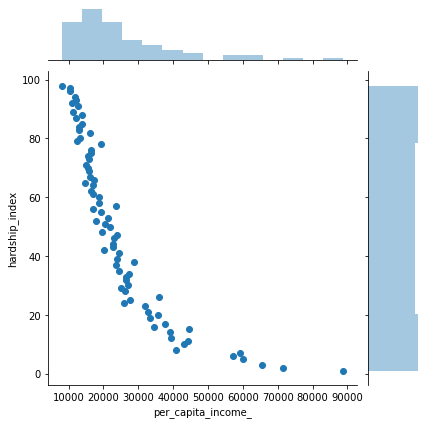

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

#### What is the correlation (if any) between college enrollment and community area name (perhaps affluent areas have higher enrollment?🤔 )

In [35]:
enrollment = %sql SELECT college_enrollment,community_area_name FROM SCHOOLS order by college_enrollment DESC;

 * ibm_db_sa://mvp13900:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/bludb
Done.


In [36]:
enrollment_df = enrollment.DataFrame().sort_values(by='college_enrollment', ascending=False)

In [37]:
enrollment_df_g = enrollment_df.groupby(by='community_area_name')

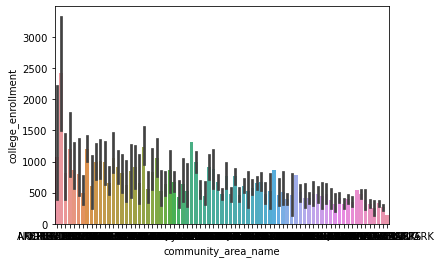

In [38]:
ax = sns.barplot(x='community_area_name', y='college_enrollment', data=enrollment_df)

 * ibm_db_sa://mvp13900:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/bludb
Done.


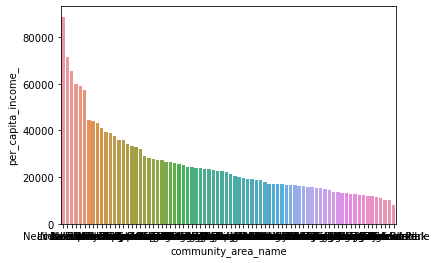

In [42]:
area_vs_income = %sql SELECT per_capita_income_, community_area_name FROM chicago_socioeconomic_data order by per_capita_income_ DESC ;
plot = sns.barplot(y='per_capita_income_',x='community_area_name', data=area_vs_income.DataFrame())

 * ibm_db_sa://mvp13900:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/bludb
Done.


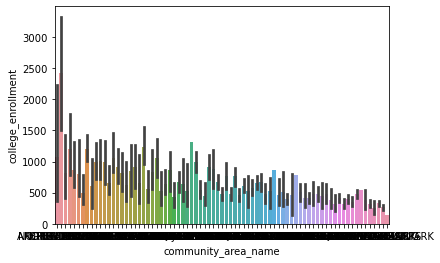

In [43]:
enrollment = %sql SELECT college_enrollment,community_area_name FROM SCHOOLS order by college_enrollment ASC;
enrollment_df = enrollment.DataFrame().sort_values(by='college_enrollment', ascending=False)
enrollment_df_g = enrollment_df.groupby(by='community_area_name')
ax = sns.barplot(x='community_area_name', y='college_enrollment', data=enrollment_df)


 * ibm_db_sa://mvp13900:***@0c77d6f2-5da9-48a9-81f8-86b520b87518.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31198/bludb
Done.


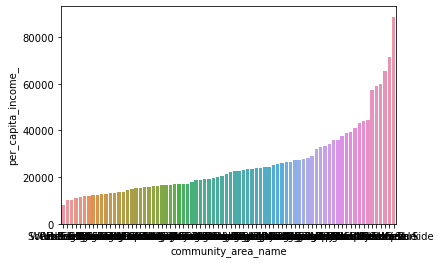

In [44]:
area_vs_income = %sql SELECT per_capita_income_, community_area_name FROM chicago_socioeconomic_data order by per_capita_income_ ASC;
plot = sns.barplot(y='per_capita_income_',x='community_area_name', data=area_vs_income.DataFrame())